In this solution the probabilities that i have taken are not that close to each other.

If the probabilities are very close like 0.80, 0.78, 0.79 then it would be interesting to see how the agent tries to learn and differentiate with such less difference between the rewards given in the long run.

I have taken 10000 runs with 500 episodes

the epsilon value is 0.1 and if the value is decreased further to like 0.01 then it will take forever for the agent to explore and get something out of its exploration.

If the value of epsilon is increased to say 0.5 it will take longer time to learn as initially the rewards are very poor and the agent will improve itself in the long run with vast knowledge thanks to greater exploration.

In [ ]:
# Solution by Abhishek Rotti with help for Incremental update rule equation from Sutton RL book and Course from University of Alberta on RL

In [2]:
# import numpy for array initialization, os for file handling, matplotlib for visualization
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# to initialize seed value for getting random numbers
np.random.seed(0)

In [4]:
# Setting up the environment required for the agent to work with

class Environment:
    """
    The environment class has a constructor to initialize the success probabilities and a step method to perform the action and get the
    stochastic reward
    """

    def __init__(self, probs):
        self.probs = probs  # success probabilities for each arm


    def step(self, action):
        # Pull arm and get stochastic reward (1 for success, 0 for failure)
        if (np.random.random() < self.probs[action]):
            return 1
        else:
            return 0

In [5]:
# creating the Agent class that works in an environment.

class Agent:
    """
    The Agent class consists of a constructor that the number of actions performed and the value of Q(a).
    It also has a update method that updates the value of Q which is the cumulative reward.
    It has a get action method to check for the next feasible action based on the epsilon value. higher chance of exploitation
    with low chance of exploration
    """
    def __init__(self, nActions, eps):
        self.nActions = nActions
        self.eps = eps
        self.n = np.zeros(nActions, dtype=np.int) # action counts n(a)
        self.Q = np.zeros(nActions, dtype=np.float) # value Q(a)

    def update_Q(self, action, reward):
        # Update Q action-value given (action, reward)
        self.n[action] += 1
        self.Q[action] += (1.0/self.n[action]) * (reward - self.Q[action])

    def get_action(self):
        # Epsilon-greedy policy
        if np.random.random() < self.eps: # explore
            return np.random.randint(self.nActions)
        else: # exploit
            return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))

In [6]:
# Start multi-armed bandit simulation
def MultiArmedBanditProblem(probs, N_episodes):
    env = Environment(probs) # initialize arm probabilities
    agent = Agent(len(env.probs), eps)  # initialize agent
    actions, rewards = [], []
    for episode in range(N_episodes):
        action = agent.get_action() # sample policy
        reward = env.step(action) # take step + get reward
        agent.update_Q(action, reward) # update Q
        actions.append(action)
        rewards.append(reward)
    return np.array(actions), np.array(rewards)

In [7]:
# Settings which are having manual probalities of 3 bandits with 1st one being the best (I expect Agent to pick this as the best one in the long term of things)
probs = [0.80, 0.45, 0.75] # bandit arm probabilities of success
N_experiments = 10000 # number of experiments to perform
N_steps = 500 # number of steps (episodes)
eps = 0.1 # probability of random exploration (fraction) this is nothing but 1 in 10 chance of exploration and 9 in 10 chance of exploitation
save_fig = True # save file in same directory
output_dir = os.path.join(os.getcwd(), "output")

In [9]:
# Run multi-armed bandit experiments
print("Running three-armed bandits with nActions = {}, eps = {}".format(len(probs), eps))
R = np.zeros((N_steps,))  # reward history sum
A = np.zeros((N_steps, len(probs)))  # action history sum
for i in range(N_experiments):
    actions, rewards = MultiArmedBanditProblem(probs, N_steps)  # perform experiment
    if (i + 1) % (N_experiments / 100) == 0:
        print("[Experiment {}/{}] ".format(i + 1, N_experiments) +
              "n_steps = {}, ".format(N_steps) +
              "reward_avg = {}".format(np.sum(rewards) / len(rewards)))
    R += rewards
    for j, a in enumerate(actions):
        A[j][a] += 1

Running three-armed bandits with nActions = 3, eps = 0.1


<ipython-input-5-fae727c99423>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.n = np.zeros(nActions, dtype=np.int) # action counts n(a)
<ipython-input-5-fae727c99423>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

[Experiment 100/10000] n_steps = 500, reward_avg = 0.746
[Experiment 200/10000] n_steps = 500, reward_avg = 0.778
[Experiment 300/10000] n_steps = 500, reward_avg = 0.806
[Experiment 400/10000] n_steps = 500, reward_avg = 0.79
[Experiment 500/10000] n_steps = 500, reward_avg = 0.734
[Experiment 600/10000] n_steps = 500, reward_avg = 0.762
[Experiment 700/10000] n_steps = 500, reward_avg = 0.752
[Experiment 800/10000] n_steps = 500, reward_avg = 0.78
[Experiment 900/10000] n_steps = 500, reward_avg = 0.776
[Experiment 1000/10000] n_steps = 500, reward_avg = 0.784
[Experiment 1100/10000] n_steps = 500, reward_avg = 0.732
[Experiment 1200/10000] n_steps = 500, reward_avg = 0.784
[Experiment 1300/10000] n_steps = 500, reward_avg = 0.74
[Experiment 1400/10000] n_steps = 500, reward_avg = 0.784
[Experiment 1500/10000] n_steps = 500, reward_avg = 0.786
[Experiment 1600/10000] n_steps = 500, reward_avg = 0.75
[Experiment 1700/10000] n_steps = 500, reward_avg = 0.772
[Experiment 1800/10000] n_s

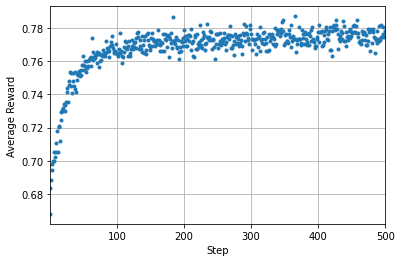

In [11]:
# Plot reward results
R_avg =  R / float(N_experiments)
plt.plot(R_avg, ".")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.grid()
ax = plt.gca()
plt.xlim([1, N_steps])
plt.show()
plt.close()

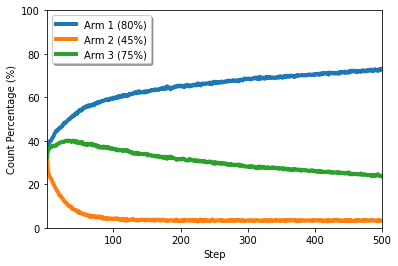

In [12]:
# Plot action results
for i in range(len(probs)):
    A_pct = 100 * A[:,i] / N_experiments
    steps = list(np.array(range(len(A_pct)))+1)
    plt.plot(steps, A_pct, "-",
             linewidth=4,
             label="Arm {} ({:.0f}%)".format(i+1, 100*probs[i]))
plt.xlabel("Step")
plt.ylabel("Count Percentage (%)")
leg = plt.legend(loc='upper left', shadow=True)
plt.xlim([1, N_steps])
plt.ylim([0, 100])
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
plt.show()
plt.close()

solution available in GITHub as well at https://github.com/MSAbhishek214/Python/blob/main/PracticePython/Module%208%20Exam/Part%20A%20Q1%20Solution.ipynb